In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from scipy import stats

In [7]:
df = pd.read_csv('Data_Tanaman_Padi_Sumatera_version_1.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [8]:
df.drop(['Provinsi', 'Tahun'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Produksi        224 non-null    float64
 1   Luas Panen      224 non-null    float64
 2   Curah hujan     224 non-null    float64
 3   Kelembapan      224 non-null    float64
 4   Suhu rata-rata  224 non-null    float64
dtypes: float64(5)
memory usage: 8.9 KB


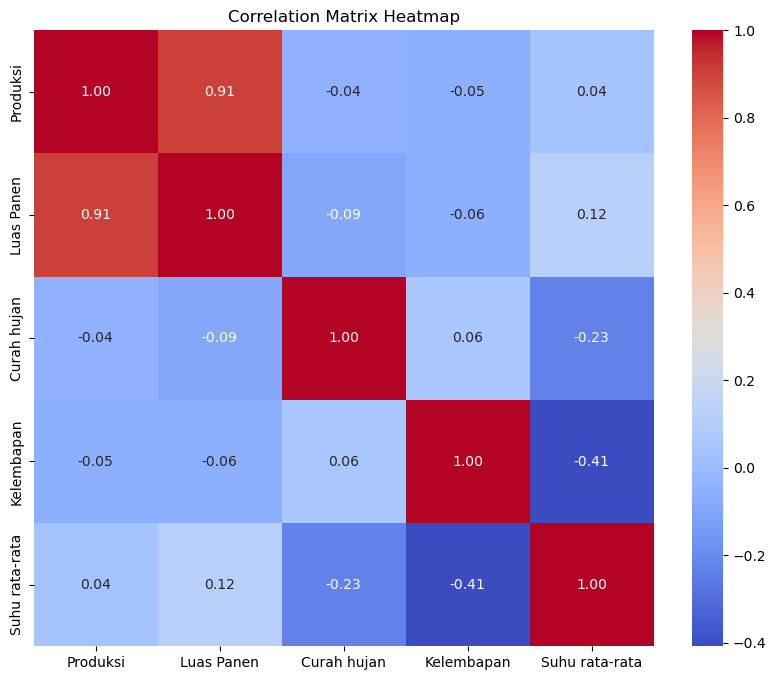

In [10]:
correlation_matrix = df.corr()

# Plot heatmap untu matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [69]:
df.head()

,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,1329536.0,323589.0,1627.0,82.00,26.06
1,1299699.0,329041.0,1521.0,82.12,26.92
2,1382905.0,339253.0,1476.0,82.72,26.27
3,1419128.0,348223.0,1557.0,83.00,26.08
4,1368074.0,337561.0,1339.0,82.46,26.31


In [56]:
z_scores = np.abs(stats.zscore(df))
threshold = 3
cleaned_data = df[(z_scores < threshold).all(axis=1)]

In [67]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Memilih fitur dan target
X = cleaned_data.iloc[:, [1]].values
y = cleaned_data.iloc[:, 0].values

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menginisialisasi dan melatih model SVR dengan kernel polinomial
regressor = SVR(kernel='linear')  # Contoh dengan derajat polinomial 1
regressor.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = regressor.predict(X_test)

# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Menampilkan hasil evaluasi
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 190296.43555101554
Mean Squared Error: 66385108025.07722
Root Mean Squared Error: 257653.0768787309


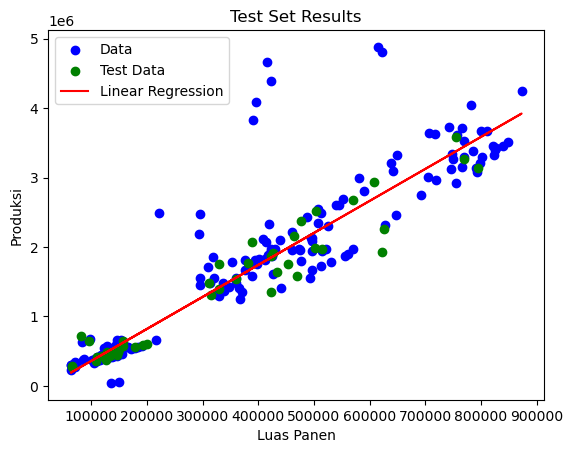

In [68]:
plt.scatter(X_train, y_train, color='blue', label='Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, regressor.predict(X_train), color='red', label='Linear Regression')
plt.title('Test Set Results')
plt.xlabel('Luas Panen')
plt.ylabel('Produksi')
plt.legend()
plt.show()